# Exercises

The excersises you will go through here were first developed by
Ellen Berntell
Institutionen för naturgeografi och kvartärgeologi
Stockholms Universitet
And then further developed by Sara Blichner (sara.blichner@aces.su.se)
January 2023.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

You will conduct experiments with two simple energy balance models, a 0-dim radiation balance model (see Section 1.2) and a 1-dim latitudinal heat flux model (see Section 1.3). Both models are run in python which you should have installed on your computer. Your exercise leader will help you get started with using the models.

## Task 1. 0-dim EBM

The zero dimensional model is very simple, and the function just returns
 \begin{align}
 T = \Big(\frac{1}{\sigma}\cdot \frac{S}{4}(1-\alpha) \Big)^{1/4}
\end{align}
and it is located in the file [ebm_models/ebm0.py](ebm_models/ebm0.py).
We can import the function by writing:

In [2]:
from ebm_models.ebm0 import ebm0

Now we can run the model by writing:

In [3]:
ebm0()

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 1
The calculated temperature is -18.56765721445396 degrees C


-18.56765721445396

Note that if you check the python file, the function we are using looks as follows
```python
def ebm0(S=1361, alpha=0.3, epsilon=1):
    """
    EBM0 - Calculates the equilibrium temperature T
    by solving the planetary radiation balance equation:
    ...
    """
```

This means that S, alpha and epsilon have default values, but these can be changed by writing e.g.:
```python
ebm0(S=1361, alpha = 0.8, epsilon = 0.5)
```

### Task 1a
Calculate $T$ for the preset values (kind of already done in the example above). How does the calculated temperature agree with what you know about the Earth's average surface temperature? Try to explain the difference.

#### Solution

In [4]:
ebm0()

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 1
The calculated temperature is -18.56765721445396 degrees C


-18.56765721445396

- Here you should mention that 
    - It does not agree with Earths temperature (average is much higher)
    - The difference is caused by the black body assumption when epsilon is equal to 1. In the real atmosphere, green house gases significantly lowers the emissivity. 

### Task 1b
The default value of the emissivity ($\varepsilon=1$) applies to a so-called blackbody. If we want to take into account the absorption and re-radiation of long-wave radiation by the atmosphere, i.e. the greenhouse effect, and calculate an equilibrium temperature at the earth's surface, then we can specify a different value for the emissivity. This value must be between 0 and 1. It has been empirically concluded that a good value for the effective emissivity of the planet Earth at the ground surface is $\varepsilon = 0.612$. Use this value and calculate T. 
- How does this agree with what you know about the Earth's average surface temperature? 
- Most common materials at the earth's surface are significantly higher  (0.92-0.96, sand 0.9, ice 0.96- 0.98, snow 0.83), how can the best value for the emissivity of the earth be so low? (Hint: think about where the outgoing longwave radiation is emitted from!) 

#### Solution

In [5]:
ebm0(epsilon=0.612)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 0.612
The calculated temperature is 14.682893279740313 degrees C


14.682893279740313

- Here you should mention
    - This is not soo bad compared to actual temperatures
    - The quite low emissivity means that earth is very far from being a black body (remitting only 61.2 percent of one) 
    - This is due to greenhouse gasses absorbing outgoing longwave radiation from the surface, and thus little of the long wave emitted from the surface actually leaves the atmosphere without being absorbed and re-emitted (then at lower temperatures)

### Task 1c
We often talk about the so-called the two or 1.5-degree target, i.e. that we should prevent global warming beyond 1.5 or 2 degrees above a pre-industrial climate. 
- Does $\varepsilon$ need to be decreased or increased to get a higher equilibrium temperature? Why?
- Experiment with the 0-dim model by changing the value of $\varepsilon$ and see how much it must change from 0.612 for T to increase by 1.5 and 2 degrees.  
 - When you have obtained a reasonable value for $\varepsilon$: do you think that a large or small change is required to raise T by two degrees?

#### Solution

In [6]:
ebm0(epsilon=0.612)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 0.612
The calculated temperature is 14.682893279740313 degrees C


14.682893279740313

1.5 degree target

In [7]:
ebm0(epsilon=0.5999)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 0.5999
The calculated temperature is 16.123442047079664 degrees C


16.123442047079664

2 degree target

In [8]:
ebm0(epsilon=0.5959)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 0.5959
The calculated temperature is 16.60766443474273 degrees C


16.60766443474273

- Here you should mention:
    - From the equation it is clear that if epsilon is smaller, then T must increase to balance the incoming side of the equation
    - Comment that a very small change in epsilon can trigger significant temperature change

### Task 1d
The impact of clouds on the climate is one of the biggest uncertainties in all climate modelling. In the simple 0-dim model, only the albedo ($\alpha$) can be changed to study the effect that the clouds might have. The default value is $\alpha = 0.3$. 
- How much does $T$ change if you change $\alpha$ to 0.$29$ or $0.31$? Let $\varepsilon= 0.612$ (the default). 
- Is this a large or small change in $T$ compared to the global warming that has occurred in the last 100 years?

#### Solution

In [9]:
ebm0(epsilon=0.612, alpha=.3)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.3
and epsilon = 0.612
The calculated temperature is 14.682893279740313 degrees C


14.682893279740313

In [10]:
ebm0(epsilon=0.612, alpha=.29)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.29
and epsilon = 0.612
The calculated temperature is 15.705406337486693 degrees C


15.705406337486693

In [11]:
ebm0(epsilon=0.612, alpha=.31)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=1361 Wm^2, alpha=0.31
and epsilon = 0.612
The calculated temperature is 13.649365306666539 degrees C


13.649365306666539

A little bit larger change than in the last 100 years. 


- Mention that:
    - The warming over the last century has been approximately 1 degree
    - These changes in albedo change the temperature a little bit more than that. 
    - This hints at why clouds are such a great uncertainty in climate modelling, a very small change inflicts great changes in temperature. 

### Task 1e
The model can easily be changed to apply to another planet, e.g. Venus. Venus is closer to the Sun and therefore receives more solar radiation. Venus also has a different albedo (much higher). According to NASA (http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html) the values are $S = 2601$ W/m$^2$ and
$\alpha = 0.9$. Use these values for S and $\alpha$ and use Earth's value for the effective emissivity ($\varepsilon=0.612$) and calculate $T$.
- How does this match NASA's value of the surface temperature of Venus ($+464 ^\circ$C).
- How does the calculated T for Venus compare to Earth?

The greenhouse effect is much greater on Venus than on Earth. Venus' atmosphere consists of 96% CO$_2$ and the pressure at the ground surface is 92 times greater than on Earth. The only way you can simulate the strong greenhouse effect in the 0-dim model is to change the value of $\varepsilon$. 
- Find a value of $\varepsilon$ that (together with $S = 2601$ W/m2 and $\alpha = 0.9$) gives a temperature $T$ close to what NASA states as the surface temperature of Venus. 
- Compare this with the value of $\varepsilon$ that applies to Earth and try to interpret what the respective values mean.

#### Solution

**Note: The S value listed in the exercise did not agree with the one in the link, sorry! Either give full score, but we'll use the one from the link**

In [12]:
ebm0(S=2601, alpha=.9, epsilon=0.612)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=2601 Wm^2, alpha=0.9
and epsilon = 0.612
The calculated temperature is -65.09101764777537 degrees C


-65.09101764777537

In [13]:
ebm0(S=2601, alpha=.9, epsilon=0.0039)

Calculating temperature for equilibrium conditions: 
Incoming solar radiation = Outgoing terrestrial radiation 
With equation: 
S/4 * (1-alpha) = epsilon * sigma * T^4 
where sigma = 5.67x10^(-8), S=2601 Wm^2, alpha=0.9
and epsilon = 0.0039
The calculated temperature is 463.24049423426936 degrees C


463.24049423426936

**Note: the values in the exercise were not completely the same as the one in the link. Using either is fine**
- Mention: 
    - Changing S and $\alpha$ induce a great change in temperature and we end up with a very cold (-64 deg C) planet with the same $\epsilon$ as the Earth. Much colder than earth due to the high albedo (in spite of higher S). 
    - The extremely high epsilon for the venusian atmopshere suggests an extreme greenhouse effect. 

## Task 2: 1-dim EBM
Here you use the 1-dim model with latitudinal heat flow as described in section 1.3, i.e.:
\begin{equation}
S_l(x)(1- \alpha (T)) = A+ BT - \frac{d}{dx}D(1-x^2)\frac{dT}{dx}
\end{equation}

This model can be run by importing...

In [14]:
from ebm_models.ebm import run_1d_ebm

and running the model with default settings like this:

If you check the file which contains the model code ([ebm_models/ebm.py](ebm_models/ebm.py)), you can see that the function starts like this:
```python
def run_1d_ebm(D=0.44,
               scaleS=1,
               A=203.3,
               B=2.09,
               coldstartflag=False,
               hadleyflag=False,
               noalbedoflag=False,
               jmx=151,
               ):
               print()
```
Meaning these values have default values (as can be seen above), but that these can be changed.
- D is the meridional heat diffusion coefficient
- scaleS can be used to set $S/S_0$, which indicates the incoming solar radiation energy in proportion to the value that applies to the current condition. If you want e.g. study a case with 10% more incoming solar energy than today, you enter the value $S/S_0 = 1.1$. If you want to test a case with 90% of today's solar radiation, enter the value $S/S_0 = 0.9$.
- A and B are as in the equation above
- coldstartflag subtracts 40 degrees from the initial temperature (so it starts from a very cold temperature
- hadleyflag: if true, the hadley cell simulation is turned on
- noalbedoflag: if true, the albedo feedback is turned off in the model (see description below).
- jmx: the number of points along the latitude (from -90 to 90 degrees N).


You cannot change the value of the albedo ($\alpha$), because it is pre-programmed in the model as a function of the temperature at each latitude (x). The default values are $\alpha = 0.3$ when $T ≥ –10^\circ$C (ice-free) and $\alpha = 0.6$ when $T < –10^\circ$C (ice cover).

### Task 2a
Discuss with a lab mate about why the model uses a limit value of $–10^\circ$C was chosen to represent ice-free and ice-covered conditions respectively. Why wouldn't  $0^\circ$C be more appropriate?

Run the model with the default values. You will then get a new window showing the result when the model has been run to equilibrium.

#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1




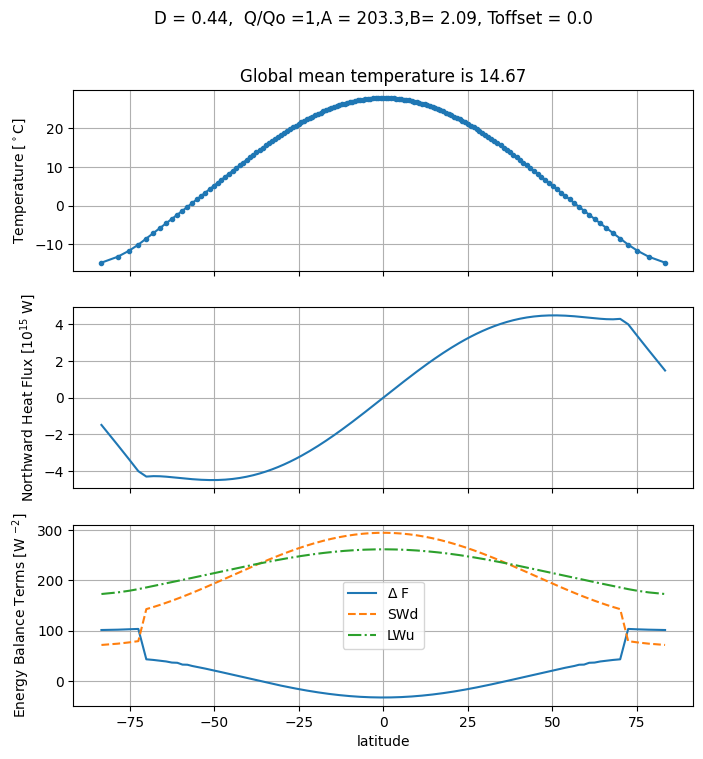

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-14.719832,101.106024,0.6,-1.483337e+15
-78.559857,-13.187923,101.748997,0.6,-2.586175e+15
-75.214368,-11.640829,102.456613,0.6,-3.360953e+15
-72.485798,-10.078013,103.237956,0.6,-4.004133e+15
-70.118394,-8.498894,42.977886,0.3,-4.298649e+15
...,...,...,...,...
70.118394,-8.498894,42.977886,0.3,4.298649e+15
72.485798,-10.078013,103.237956,0.6,4.004133e+15
75.214368,-11.640829,102.456613,0.6,3.360953e+15


In [15]:
run_1d_ebm()

- Mention:
    - Much of this feedback will be related to sea ice (though snow also changes land albedo)
    - The ocean has a high heat capacity and generally holds higher temperatures than the atmosphere in winter (in addition to the effect of salinity on the freezing temperature)


### Task 2b (vary D)
Run the model with the default parameter values. Note the highest value of poleward heat flux, the global mean temperature ($T_m$), and the pole-to-equator temperature difference ($\Delta T_{p-e}$). Then run the model without latitudinal heat flux (i.e. set $D = 0$). How does $T_m$ and $\Delta T_{p-e}$ change? And how does the temperature change at different latitudes? Can you see where the border between ice-covered and ice-free is when $D=0$ and $D=0.44$ respectively? What is the main significance of the latitudinal heat transport for the climate on earth.

#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1




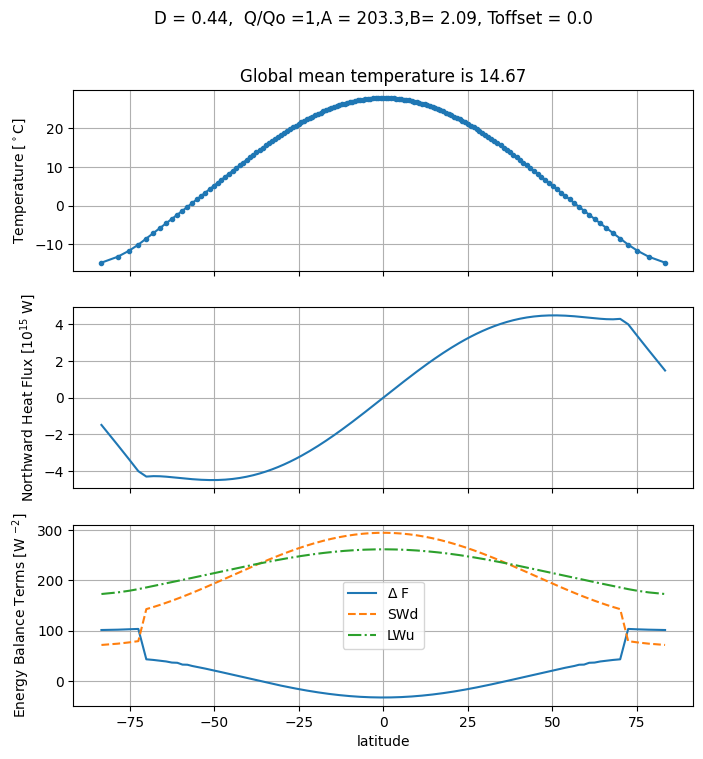

In [16]:
df_default = run_1d_ebm(D=.44)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0 
scaleS=1




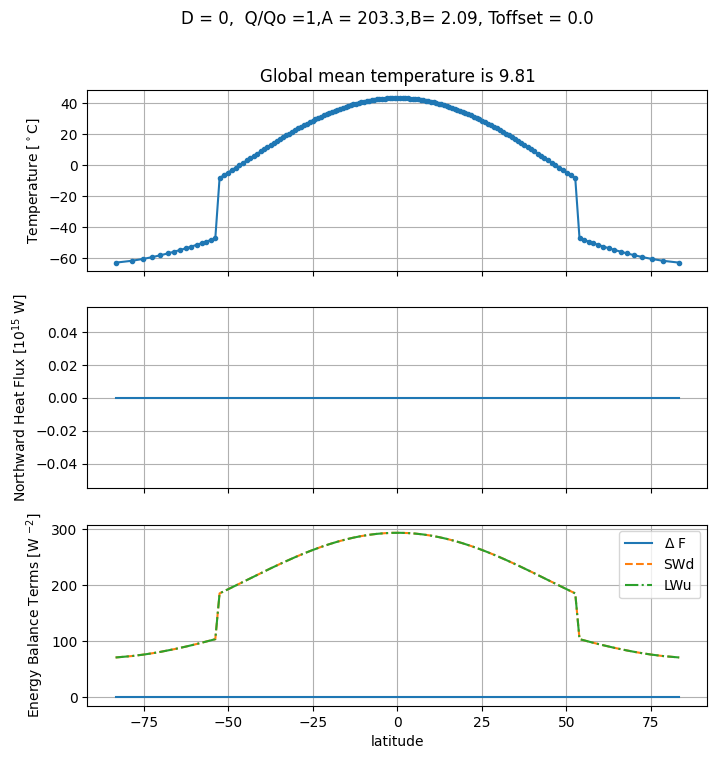

In [17]:
df_no_transport = run_1d_ebm(D=0)

- Mention:
    - Temperature increases at equator and decreases at the poles, meaning pole to equator difference increases.
    - The mean temperature decreases
    - The ice edge is signigicantly closer to the equator with no latitudal heat flow
    - The main significance of meridional heat flux on the earth is to distribute the heat and thus to prevent freeze up at the pole. Heats the average. 

### Task 2c (vary D)
Test the values $D = 0.24$ and $D = 0.64$. Compare with the default ($D = 0.44$). Does the climate change as you expect as $D$ increases or decreases? Why/why not? How do $T_m$ and $\Delta T_{p-e}$ change? How does the boundary between ice-free and ice-covered move? How does the maximum value of the latitudinal heat flux change? How does the balance between incoming shortwave radiation (SWd) and outgoing longwave radiation (LWu) change at different latitudes?

#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.0 
scaleS=1




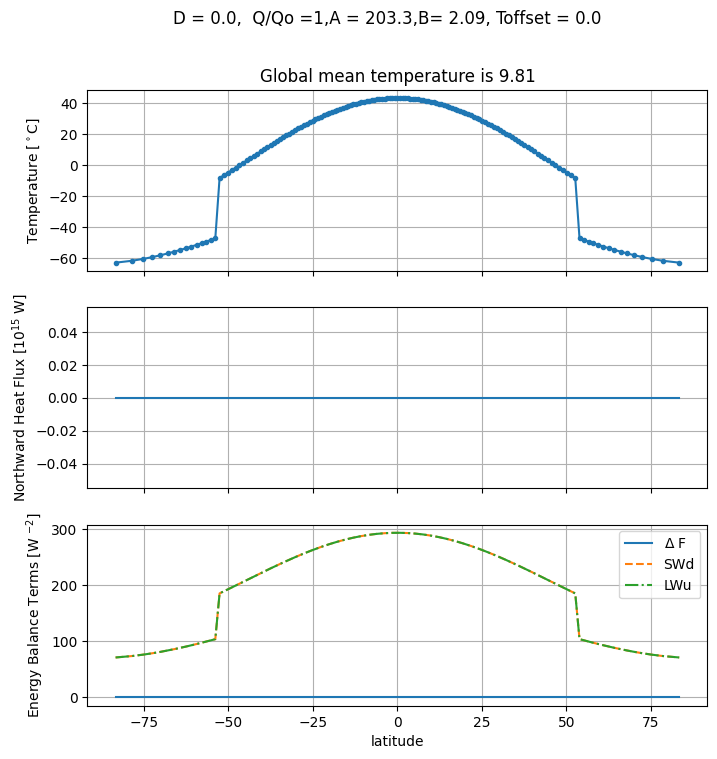

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-63.095924,0.0,0.6,-0.0
-78.559857,-61.871581,0.0,0.6,-0.0
-75.214368,-60.663673,0.0,0.6,-0.0
-72.485798,-59.472198,0.0,0.6,-0.0
-70.118394,-58.297158,0.0,0.6,-0.0
...,...,...,...,...
70.118394,-58.297158,0.0,0.6,0.0
72.485798,-59.472198,0.0,0.6,0.0
75.214368,-60.663673,0.0,0.6,0.0


In [18]:
run_1d_ebm(D=.0)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.24 
scaleS=1




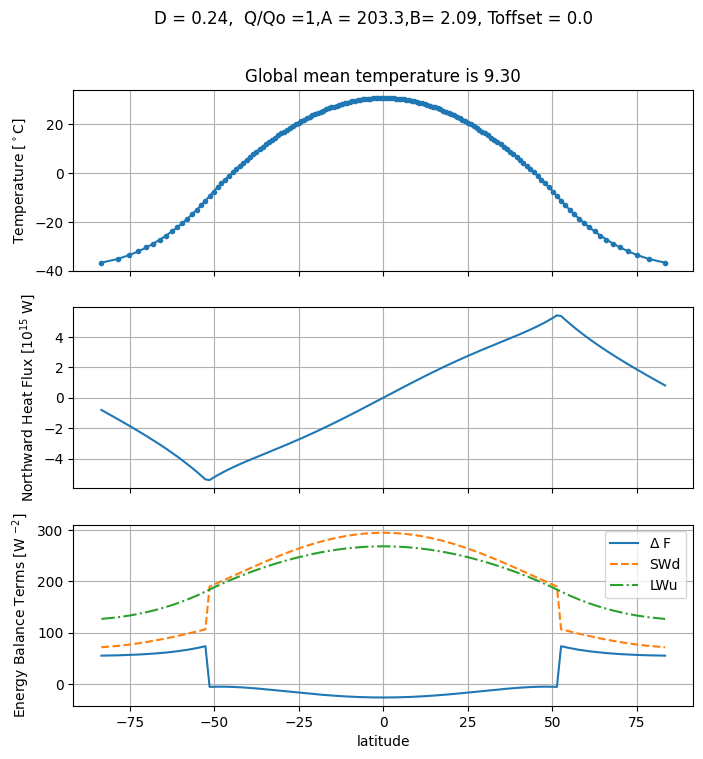

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-36.757451,55.047409,0.6,-8.065420e+14
-78.559857,-35.228356,55.684341,0.6,-1.409886e+15
-75.214368,-33.680093,56.395676,0.6,-1.837221e+15
-72.485798,-32.111705,57.183483,0.6,-2.195166e+15
-70.118394,-30.522201,58.049494,0.6,-2.514613e+15
...,...,...,...,...
70.118394,-30.522201,58.049494,0.6,2.514613e+15
72.485798,-32.111705,57.183483,0.6,2.195166e+15
75.214368,-33.680093,56.395676,0.6,1.837221e+15


In [19]:
run_1d_ebm(D=.24)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.64 
scaleS=1




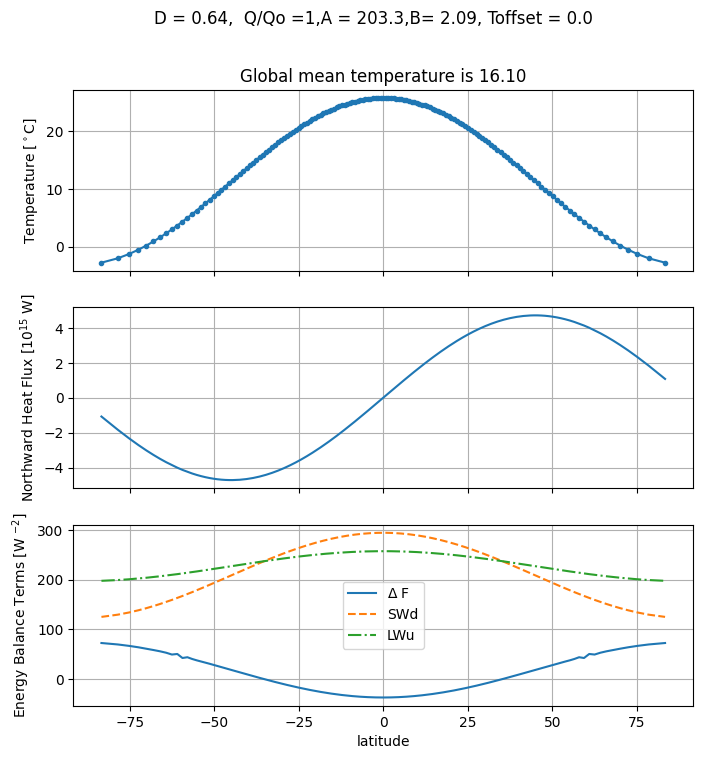

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-2.777049,72.494162,0.3,-1.076036e+15
-78.559857,-2.021902,69.595618,0.3,-1.832796e+15
-75.214368,-1.276884,66.729308,0.3,-2.326318e+15
-72.485798,-0.542020,63.928220,0.3,-2.705729e+15
-70.118394,0.182755,61.089033,0.3,-3.015031e+15
...,...,...,...,...
70.118394,0.182755,61.089033,0.3,3.015031e+15
72.485798,-0.542020,63.928220,0.3,2.705729e+15
75.214368,-1.276884,66.729308,0.3,2.326318e+15


In [20]:
run_1d_ebm(D=.64)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1




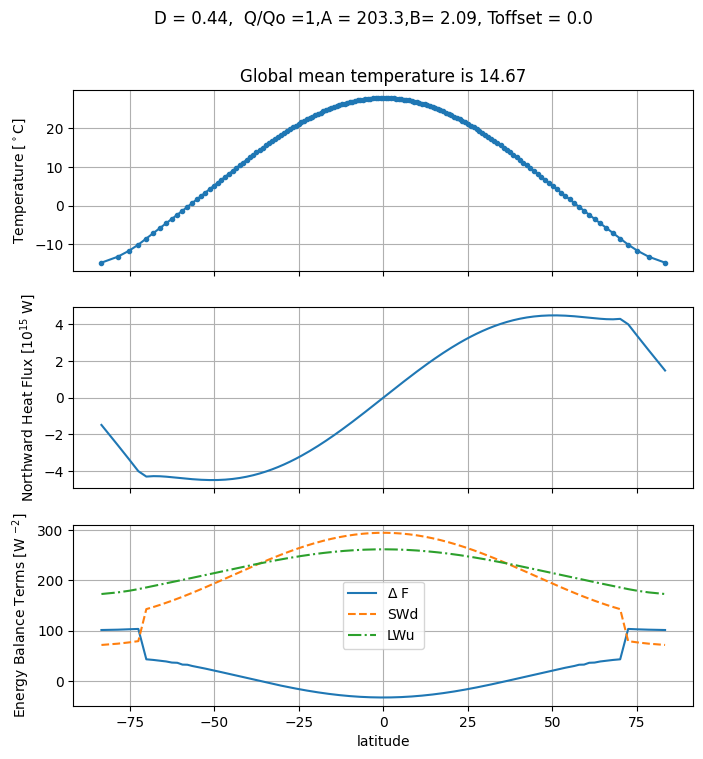

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-14.719832,101.106024,0.6,-1.483337e+15
-78.559857,-13.187923,101.748997,0.6,-2.586175e+15
-75.214368,-11.640829,102.456613,0.6,-3.360953e+15
-72.485798,-10.078013,103.237956,0.6,-4.004133e+15
-70.118394,-8.498894,42.977886,0.3,-4.298649e+15
...,...,...,...,...
70.118394,-8.498894,42.977886,0.3,4.298649e+15
72.485798,-10.078013,103.237956,0.6,4.004133e+15
75.214368,-11.640829,102.456613,0.6,3.360953e+15


In [21]:
run_1d_ebm()

- Mention:
    - When D increases a little bit from 0, the mean temperature actually decreases a bit. This is because more parts of the earth fall below 10 degrees 
    - When D is increased to 0.64, then the global mean temperature increases again because most of the ice melts and the sea-ice feedback means more incoming sunlight is absorbed. 
    - $\Delta T_{p-e}$ increases with decreasing $D$ and decreases with increasing $D$, which makes sense because the higher the value of $D$ is, the more of the heat is transported north. 
    - The boundary of the ice moves to lower latitudes when $D$ is decreased from the default value, but when increasing $D$ from $D=0$ the ice edge actually moves towards the equator as well. This is because more parts of the globe reach below -10 temperatures when the heat is allowed to mix a tiny bit, but if it mixes a lot, it gets too warm in the poles. 
    - The difference between SWd and LWu at the equator increases with increasing $D$. At the poles it's a bit less clear due to the ice edge. When there is no ice, there is more absorbed solar radiation, which reduces the difference in incoming and outgoing. At the same time, there is potentially faster transport into the area, which increases the energy surplus. The result is that is it similar in the two cases, but with a much clearer change at the ice edge for small $D$

### Task 2d (varying $S/S_0$)
The sun's radiation has increased during the time the Earth has existed. According to Ruddiman (Ruddiman 2014,  p. 45) the sun's radiation was 25% to 30% weaker when the Earth was young. Indications from sedimentary rocks say that the Earth was not ice-covered during the first 3 billion years, i.e. until about 1.6 billion years ago. According to Fig. 3-2 in Ruddiman, the sun's radiation was then about 85% of today's value. You can simulate this it by setting $S/S_0$ = 0.85. Run the model (use default values for D, A and B). What kind of climate does it produce? Where is it ice-covered or ice-free? How does it match the geological indications (you are allowed to google)? What you are now thinking about, is what is usually called the Faint young Sun paradox: "With such a weak sun, why wasn't the Earth covered in ice for the first two-thirds of its history?" (Ruddiman p. 45). Yes, how can that be? Do you have any suggestions for an explanation?

#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=0.85




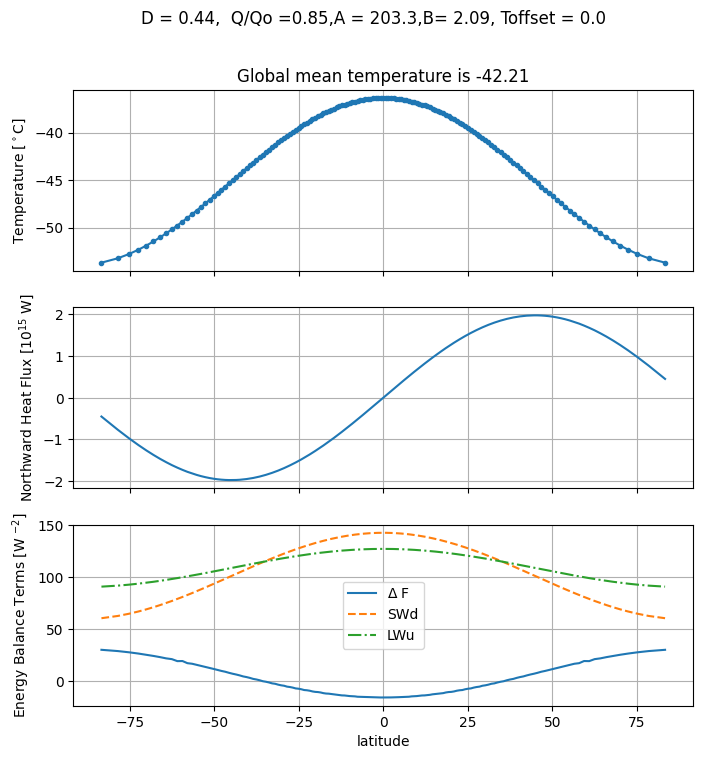

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-53.701169,30.349465,0.6,-4.504813e+14
-78.559857,-53.241329,29.135479,0.6,-7.672911e+14
-75.214368,-52.787661,27.937918,0.6,-9.739094e+14
-72.485798,-52.340165,26.756116,0.6,-1.132726e+15
-70.118394,-51.898842,25.590279,0.6,-1.262244e+15
...,...,...,...,...
70.118394,-51.898842,25.590279,0.6,1.262244e+15
72.485798,-52.340165,26.756116,0.6,1.132726e+15
75.214368,-52.787661,27.937918,0.6,9.739094e+14


In [22]:
run_1d_ebm(scaleS=.85)

- https://en.wikipedia.org/wiki/Faint_young_Sun_paradox


### Task 2e (varying $S/S_0$)
Assume that the sun's radiation will continue to increase at approximately the same rate as before, i.e. with about 10% per billion years (which corresponds to 1% per 100 million years, or 1 part per thousand per 10 million years). Investigate how long it should take for the Earth to become completely ice-free (if only solar radiation determines this) by increasing the value of $S/S_0$ so that it becomes greater than 1. Use default values for the other parameters.



#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1.002




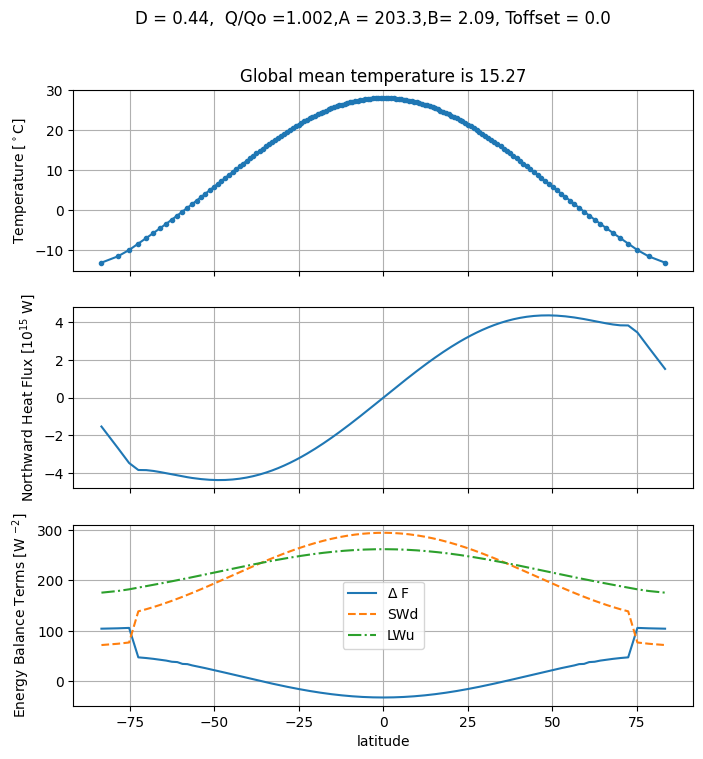

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-13.223029,104.091504,0.6,-1.526877e+15
-78.559857,-11.645885,104.823638,0.6,-2.662989e+15
-75.214368,-10.052572,105.624349,0.6,-3.461950e+15
-72.485798,-8.442522,47.123266,0.3,-3.833373e+15
-70.118394,-7.044629,45.739785,0.3,-3.839816e+15
...,...,...,...,...
70.118394,-7.044629,45.739785,0.3,3.839816e+15
72.485798,-8.442522,47.123266,0.3,3.833373e+15
75.214368,-10.052572,105.624349,0.6,3.461950e+15


In [23]:
run_1d_ebm(scaleS=1.002)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1.0029




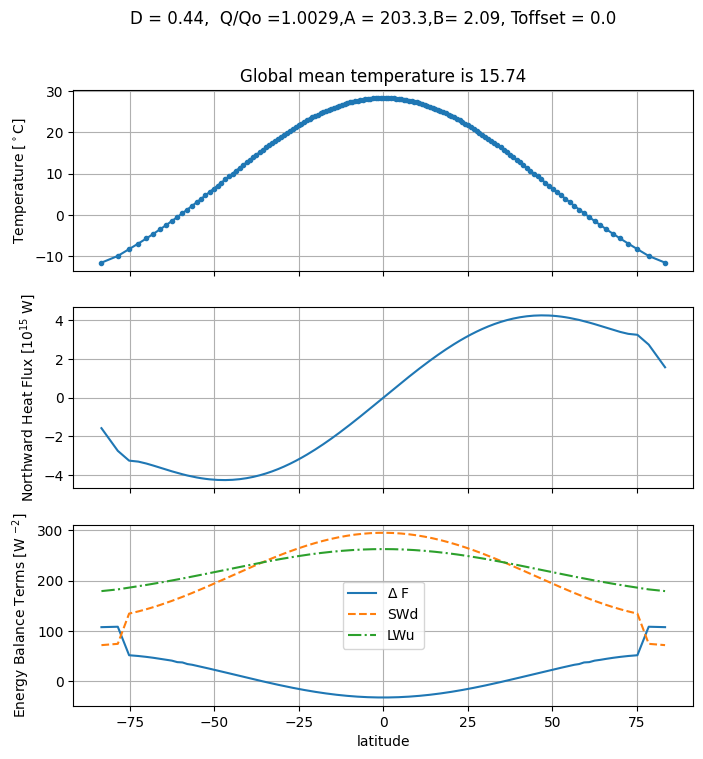

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-11.627120,107.362667,0.6,-1.574570e+15
-78.559857,-10.000413,108.196040,0.6,-2.747177e+15
-75.214368,-8.356433,51.549788,0.3,-3.254322e+15
-72.485798,-6.989170,50.034817,0.3,-3.304664e+15
-70.118394,-5.763353,48.287422,0.3,-3.403816e+15
...,...,...,...,...
70.118394,-5.763353,48.287422,0.3,3.403816e+15
72.485798,-6.989170,50.034817,0.3,3.304664e+15
75.214368,-8.356433,51.549788,0.3,3.254322e+15


In [24]:
run_1d_ebm(scaleS=1.0029)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1.003




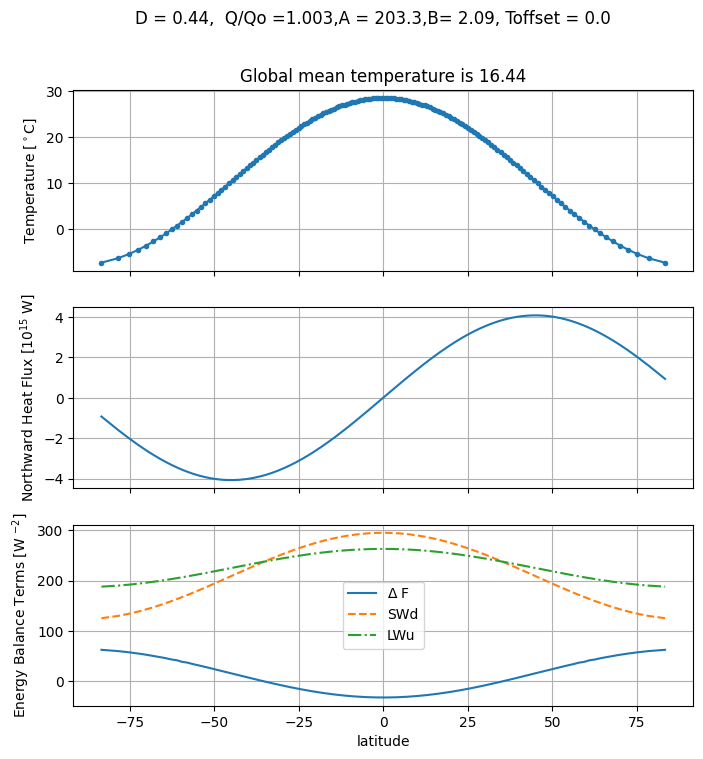

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-7.297460,62.671648,0.3,-9.302440e+14
-78.559857,-6.347890,60.164770,0.3,-1.584456e+15
-75.214368,-5.411065,57.691574,0.3,-2.011122e+15
-72.485798,-4.486987,55.251829,0.3,-2.339078e+15
-70.118394,-3.575655,52.847856,0.3,-2.606554e+15
...,...,...,...,...
70.118394,-3.575655,52.847856,0.3,2.606554e+15
72.485798,-4.486987,55.251829,0.3,2.339078e+15
75.214368,-5.411065,57.691574,0.3,2.011122e+15


In [25]:
run_1d_ebm(scaleS=1.003)

**Approximately 30 million years**

- Mention: 
    - It would take approximatley 30 million years

### Task 2f (varying $S/S_0$ from cold start)
When the 1-dim model is run, the program code provides certain initial values for all variables at all latitudes. You can choose between two different sets of initial values by running the model with a so-called cold (iced) start or normal start. If you set 'coldstartflag=True' when calling run_1d_ebm(), you choose the cold start.
Choose default values of $D$, $S/S_0$, $A$ and $B$. How does the simulated climate differ from that obtained with a normal start? How much must $S/S_0$ change, i.e. how much brighter does the sun have to shine, to get an ice-free planet if we start from an ice-covered planet? Compare with the answer in Task 2e. Try to explain the difference.

#### Solution

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1




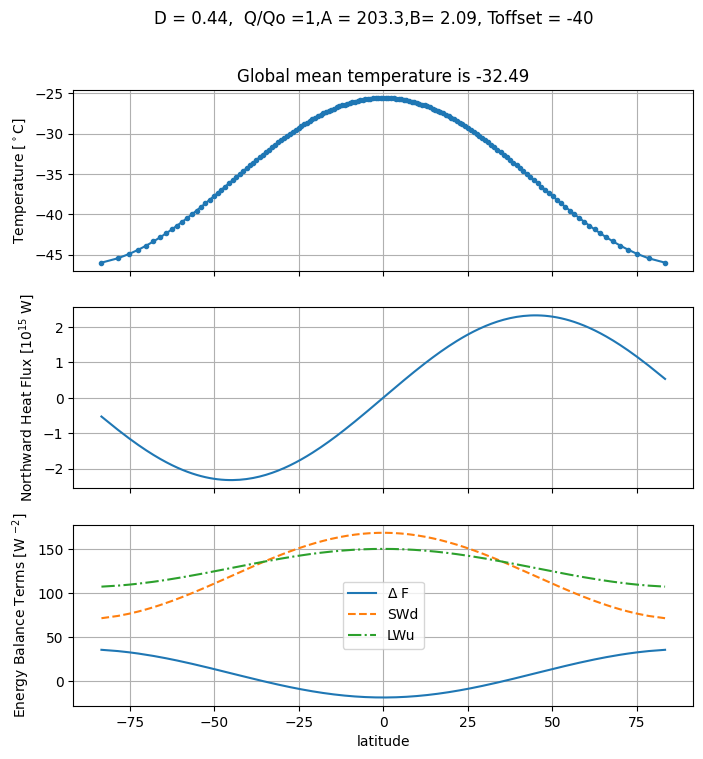

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-46.012071,35.705254,0.6,-5.299780e+14
-78.559857,-45.471082,34.277043,0.6,-9.026955e+14
-75.214368,-44.937355,32.868004,0.6,-1.145775e+15
-72.485798,-44.410889,31.478135,0.6,-1.332619e+15
-70.118394,-43.891686,30.107437,0.6,-1.485001e+15
...,...,...,...,...
70.118394,-43.891686,30.107437,0.6,1.485001e+15
72.485798,-44.410889,31.478135,0.6,1.332619e+15
75.214368,-44.937355,32.868004,0.6,1.145775e+15


In [26]:
run_1d_ebm(coldstartflag=True)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1.217




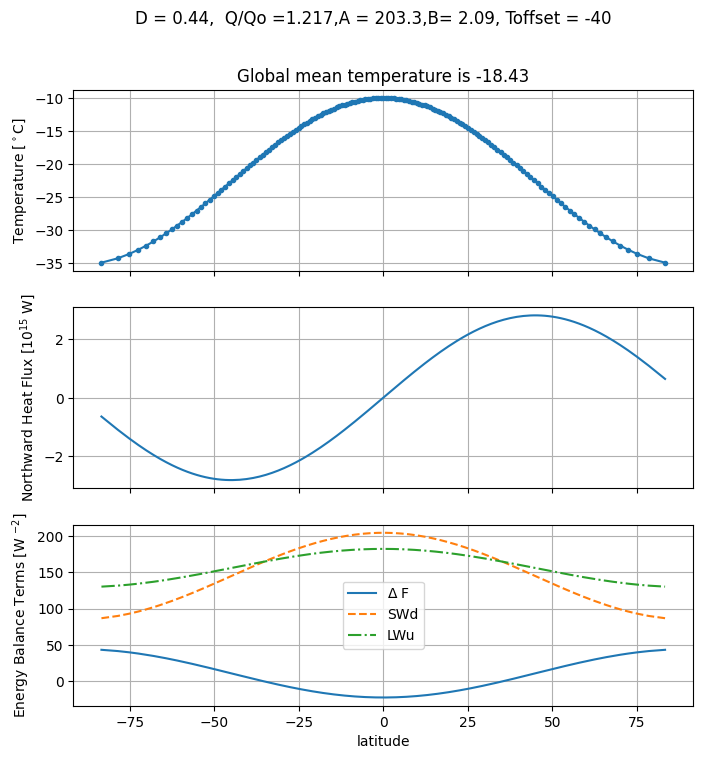

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-34.888508,43.453294,0.6,-6.449832e+14
-78.559857,-34.230125,41.715162,0.6,-1.098580e+15
-75.214368,-33.580579,40.000361,0.6,-1.394408e+15
-72.485798,-32.939871,38.308890,0.6,-1.621797e+15
-70.118394,-32.308000,36.640750,0.6,-1.807246e+15
...,...,...,...,...
70.118394,-32.308000,36.640750,0.6,1.807246e+15
72.485798,-32.939871,38.308890,0.6,1.621797e+15
75.214368,-33.580579,40.000361,0.6,1.394408e+15


In [27]:
run_1d_ebm(scaleS=1.217,
           coldstartflag=True)

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1.218




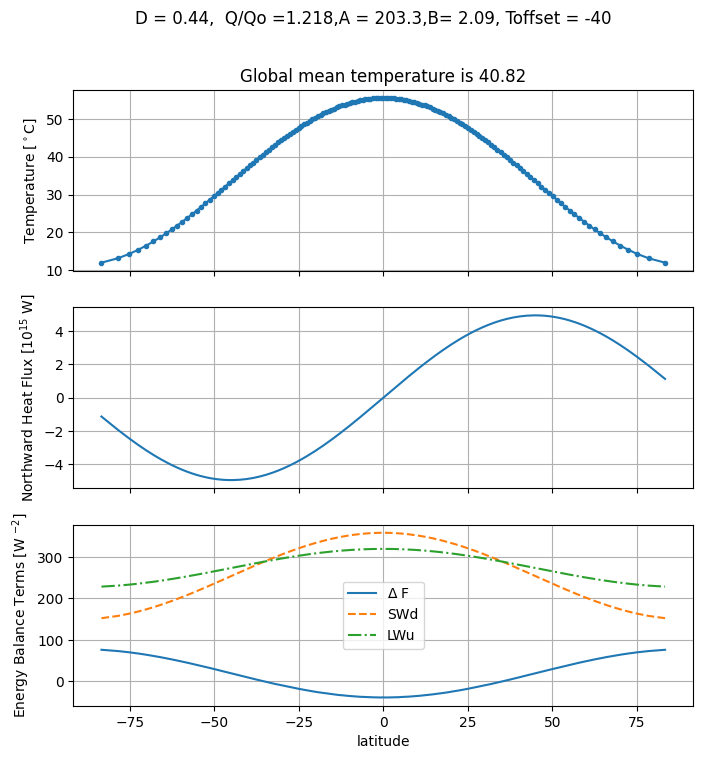

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,11.989362,76.105748,0.3,-1.129648e+15
-78.559857,13.142479,73.061501,0.3,-1.924095e+15
-75.214368,14.280119,70.058326,0.3,-2.442221e+15
-72.485798,15.402281,67.094896,0.3,-2.840475e+15
-70.118394,16.508961,64.176259,0.3,-3.165284e+15
...,...,...,...,...
70.118394,16.508961,64.176259,0.3,3.165284e+15
72.485798,15.402281,67.094896,0.3,2.840475e+15
75.214368,14.280119,70.058326,0.3,2.442221e+15


In [28]:
run_1d_ebm(scaleS=1.218,
           coldstartflag=True)

**Would need to increase S by approximately 21.8%**


- Mention: 
    - Would need to increase S by approximately 21.8%
    - The differene to the last exercise originates from introducing a feedback which makes two stable states for the climate depending on the start point. 
    - If you start with a planet with little ice, you will reach a warm equilibrium, but if you start from a very cold earth, the ice will reduce the absorbed incoming radiation considerably, and it will take a lot more energy to increase the temperature enough to melt the ice.

### Task 2g (vary the CO$_2$ content)
A simple and rough way to vary the CO$_2$ content in the model is to adjust the parameter $A$ by adding some value $\Delta A$ to $A$:
\begin{align}
\Delta A = −3 ln(CO_2/360)
\end{align}

where CO$_2$ is the new atmospheric CO$_2$ content in ppmv. The table below provides some realistic examples for you to study. Run the model for each case and fill in the blank column for the global mean temperature ($T_m$).

| CO$_2$ | $\Delta A$ | $A$   | $T_m$ |
|--------|------------|-------|-------|
| 200    | 1.8        | 205.1 |       |
| 280    | 0.8        | 204.1 |       |
| 360    | 0          | 203.3 |       |
| 400    | −0.3       | 203.0 |       |
| 720    | −2.1       | 201.2 |       |



The natural CO$_2$ content has varied approximately between 200 and 280 ppmv during the glacial cycles of the last million years. 280 ppmv is the "pre-industrial" level around the end of the 18th century. In the mid-1990s, the concentration was 360 ppmv, which is the default value in the 1-dim model. In May 2013, for the first time in modern times, the level of 400 ppmv was reached and the value of 720 ppmv is a likely level at the end of this century unless strong measures are taken to reduce CO2 emissions.
- What global average temperature ($T_m$) does the model give for the different CO$_2$ levels in the table?
- Do the simulated $T_m$ values of 200 and 280 ppmv agree with our knowledge of global temperature variations during glacial cycles? If not, try to explain why they simulated $T_m$ variations are too large or too small.
- At what approximate latitude is the ice-covered/ice-free boundary for the respective CO$_2$ level?
- Can you use the values in the table to calculate the climate sensitivity of the model, i.e. the global mean temperature change when the CO$_2$ content doubles? If so, what value of climate sensitivity do you get? Do you get a unique value, or can there be multiple values?

#### Solution


| CO$_2$ | $\Delta A$ | $A$   | $T_m$ |
|--------|------------|-------|-------|
| 200    | 1.8        | 205.1 | 12.61 |
| 280    | 0.8        | 204.1 | 13.9  |
| 360    | 0          | 203.3 | 14.67 |
| 400    | −0.3       | 203.0 | 15.19 |
| 720    | −2.1       | 201.2 | 17.11 |

**Many were confused about how to calculate climate sensitivity, but the definition is actually in the text**: "Can you use the values in the table to calculate the climate sensitivity of the model, i.e. the global mean temperature change when the CO$_2$ content doubles?"

If you check the lecture notes, it says that the climate sensitivity is actually defined as a doubling in CO2 from pre-industrial level. That is not in the table (would be 280 to 560 ppmv). So if you used doubling from mid 19th century (360 ppmv), that's ok! 

- Mention: 
    - Fill out the table above
    - Mention that glacial cycles are depending on other factors than CO2 levels (Milankovitch (Orbital) Cycles) and this is why the temeprature variations from 200 to 280 is much smaller than that between glacial and inter-glacial periods. 
    - Mention ice edge for high and low CO2
    - Calculate climate sensitivity (see below) 

Running 1-D model with settings: 
A=205.1, B=2.09, Dmag=0.44 
scaleS=1




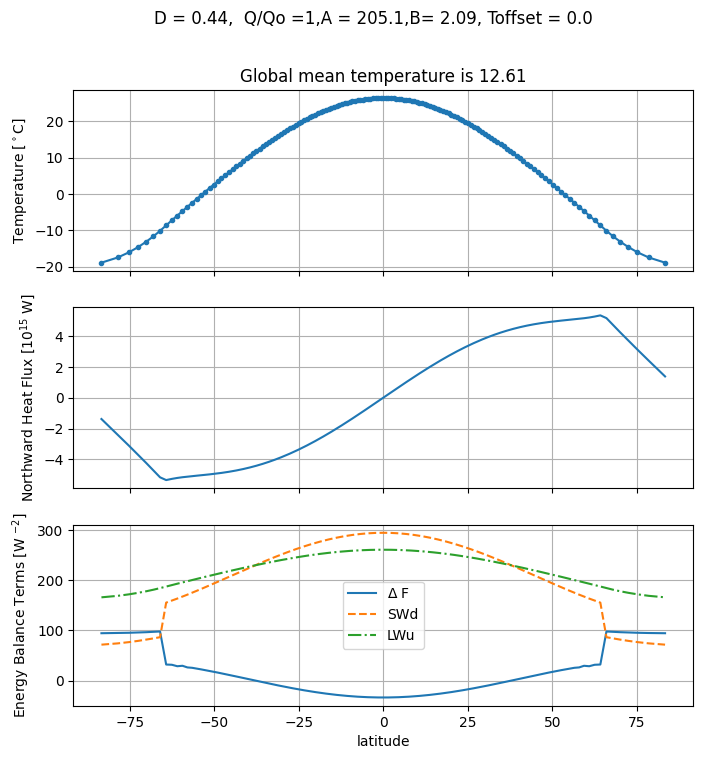

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-18.894308,94.181371,0.6,-1.382396e+15
-78.559857,-17.467318,94.604928,0.6,-2.407927e+15
-75.214368,-16.027520,95.089825,0.6,-3.126415e+15
-72.485798,-14.574428,95.634899,0.6,-3.721261e+15
-70.118394,-13.107548,96.245878,0.6,-4.245644e+15
...,...,...,...,...
70.118394,-13.107548,96.245878,0.6,4.245644e+15
72.485798,-14.574428,95.634899,0.6,3.721261e+15
75.214368,-16.027520,95.089825,0.6,3.126415e+15


In [29]:
run_1d_ebm(A=205.1) 

Running 1-D model with settings: 
A=203.3, B=2.09, Dmag=0.44 
scaleS=1




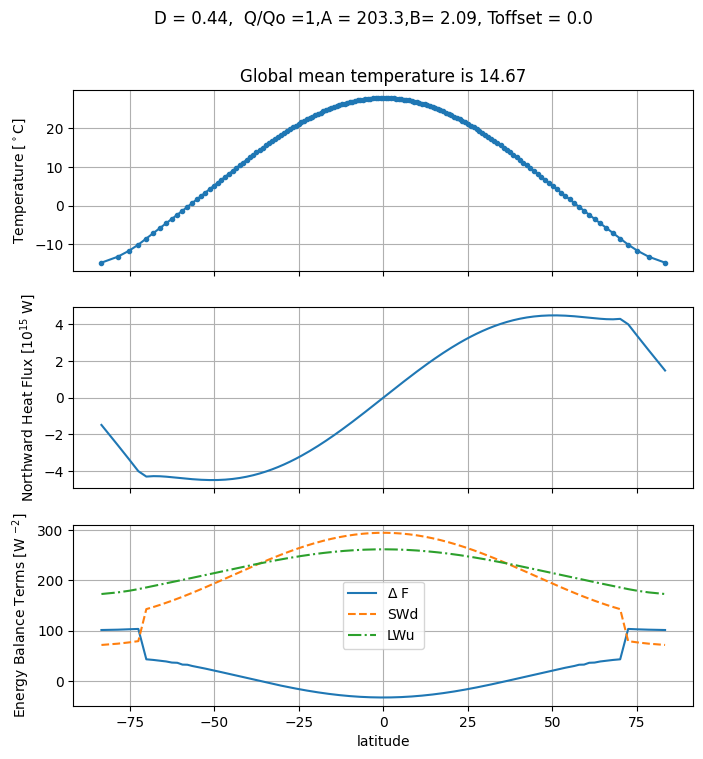

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-14.719832,101.106024,0.6,-1.483337e+15
-78.559857,-13.187923,101.748997,0.6,-2.586175e+15
-75.214368,-11.640829,102.456613,0.6,-3.360953e+15
-72.485798,-10.078013,103.237956,0.6,-4.004133e+15
-70.118394,-8.498894,42.977886,0.3,-4.298649e+15
...,...,...,...,...
70.118394,-8.498894,42.977886,0.3,4.298649e+15
72.485798,-10.078013,103.237956,0.6,4.004133e+15
75.214368,-11.640829,102.456613,0.6,3.360953e+15


In [30]:
run_1d_ebm(A=203.3) 

Running 1-D model with settings: 
A=201.2, B=2.09, Dmag=0.44 
scaleS=1




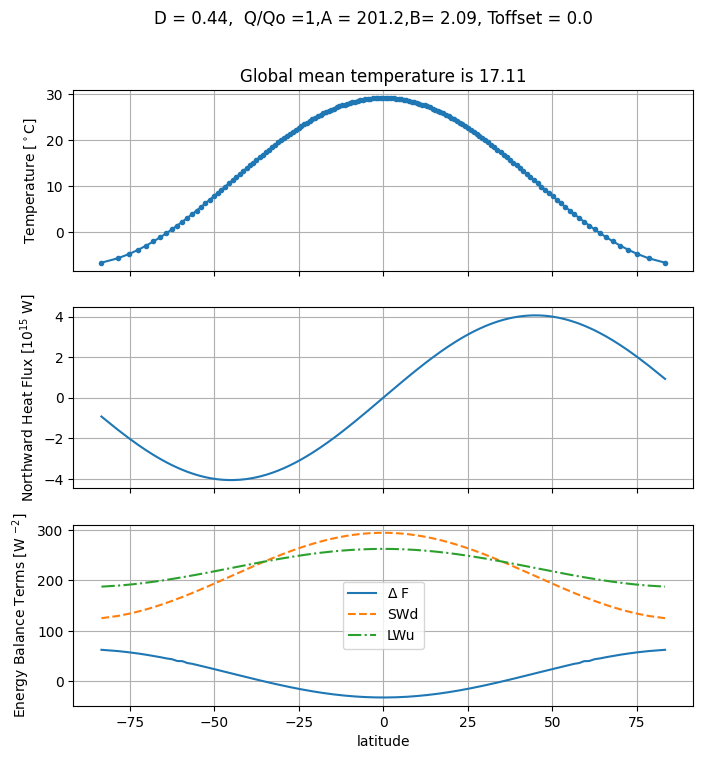

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-6.561794,62.484195,0.3,-9.274618e+14
-78.559857,-5.615063,59.984744,0.3,-1.579717e+15
-75.214368,-4.681042,57.519880,0.3,-2.005110e+15
-72.485798,-3.759723,55.082847,0.3,-2.332072e+15
-70.118394,-2.851128,52.695852,0.3,-2.598756e+15
...,...,...,...,...
70.118394,-2.851128,52.695852,0.3,2.598756e+15
72.485798,-3.759723,55.082847,0.3,2.332072e+15
75.214368,-4.681042,57.519880,0.3,2.005110e+15


In [31]:
run_1d_ebm(A=201.2) 

**The temperature change from this doubling of CO$_2$, and thus the climate sensitivity of the model,  is then:**

In [32]:
17.11-14.67

2.4399999999999995

Alternatively, you could have calculated the $\Delta A$ from a doubling of CO2 from 280 ppmv. 

##### PI level CO2

In [33]:
deltaA = -3*np.log(560/360)
deltaA

-1.3254982568371176

In [34]:
A560 = 203.3 + deltaA
A560

201.9745017431629

In [35]:
A280 = 204.1

Running 1-D model with settings: 
A=201.9745017431629, B=2.09, Dmag=0.44 
scaleS=1




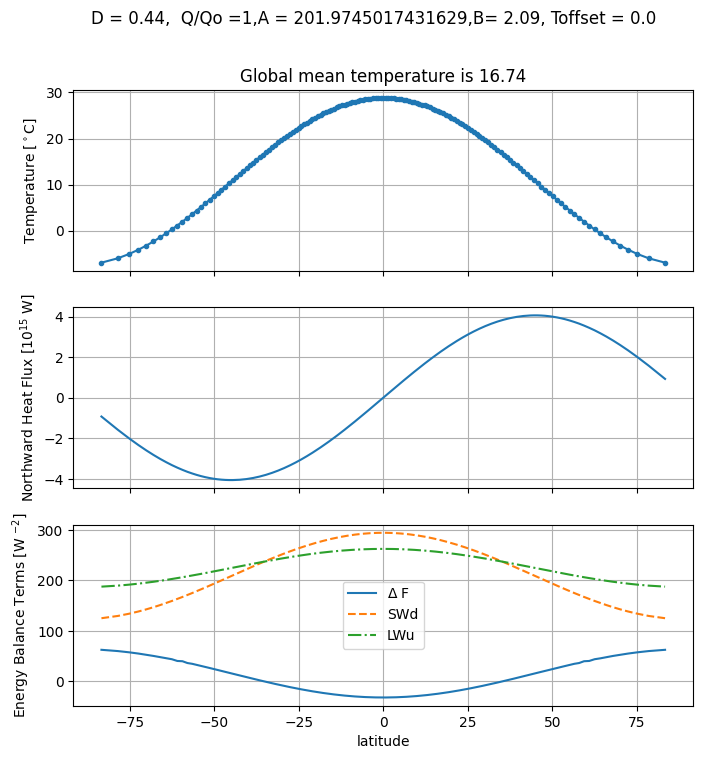

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-6.932369,62.484184,0.3,-9.274610e+14
-78.559857,-5.985639,59.984900,0.3,-1.579717e+15
-75.214368,-5.051616,57.518790,0.3,-2.005106e+15
-72.485798,-4.130302,55.087512,0.3,-2.332085e+15
-70.118394,-3.221693,52.682903,0.3,-2.598735e+15
...,...,...,...,...
70.118394,-3.221693,52.682903,0.3,2.598735e+15
72.485798,-4.130302,55.087512,0.3,2.332085e+15
75.214368,-5.051616,57.518790,0.3,2.005106e+15


In [36]:
run_1d_ebm(A= A560)


Running 1-D model with settings: 
A=204.1, B=2.09, Dmag=0.44 
scaleS=1




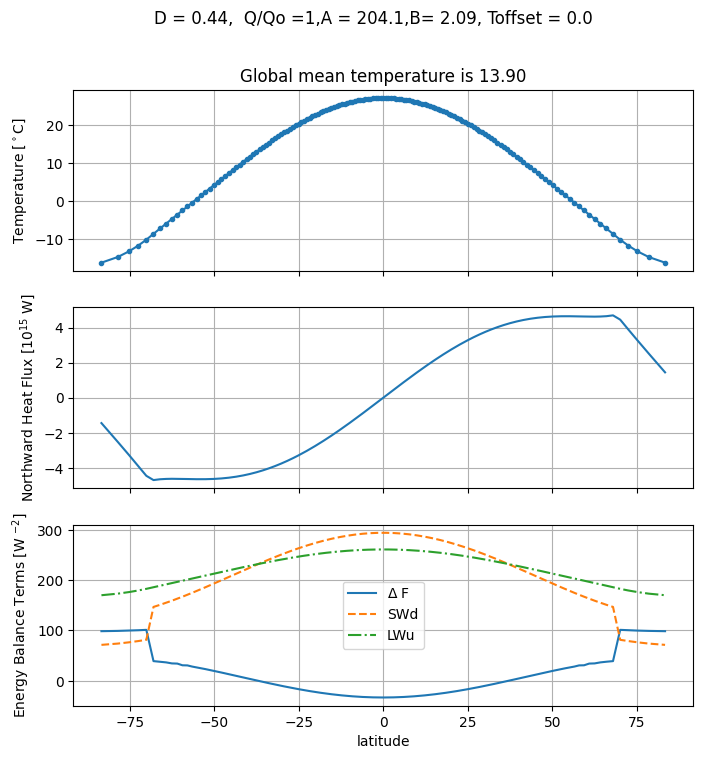

,T_C,Delta_F,albedo,F
latitude,,,,
-83.402352,-16.300039,98.603402,0.6,-1.446857e+15
-78.559857,-14.806048,99.166938,0.6,-2.521754e+15
-75.214368,-13.297732,99.795050,0.6,-3.276192e+15
-72.485798,-11.774568,100.486542,0.6,-3.901891e+15
-70.118394,-10.236024,101.255246,0.6,-4.454442e+15
...,...,...,...,...
70.118394,-10.236024,101.255246,0.6,4.454442e+15
72.485798,-11.774568,100.486542,0.6,3.901891e+15
75.214368,-13.297732,99.795050,0.6,3.276192e+15


In [37]:
run_1d_ebm(A= A280)


**Climate sensitivity**:

In [38]:
16.74-13.9

2.839999999999998

**The different values for the climate sensitivity may e.g. relate to the fact that the sea-ice feedback is less important the less ice you have initially**

# References

- Ruddiman, W. F. (William F.), 1943-. - Earth's climate : past and future / William F. Ruddiman.. - 2014 - Third edition.. - ISBN: 9781429255257